In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import files
mouse_drug_data = pd.read_csv('mouse_drug_data.csv')
clinical_trial_data = pd.read_csv('clinicaltrial_data.csv')
mouse_drug_data.head()
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset. Merging on Mouse ID the common column between the dataframes.

combined_trial_data = pd.merge(clinical_trial_data, mouse_drug_data,  on="Mouse ID", how ="left")
combined_trial_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint. we do this to find the tumor volume at different times with a specific drug
tumor_volume_mean_data = combined_trial_data.groupby(['Drug','Timepoint']).mean()["Tumor Volume (mm3)"]
tumor_volume_mean_data.head()
#checking the type of data
#type(tumor_volume_mean_data)

# Convert to DataFrame so that we can manipulate the date. Reset index since series don't have indicies but we need the index to call our data 
tumor_volume_mean_data = pd.DataFrame(tumor_volume_mean_data)
tumor_volume_mean_data.head().reset_index()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_sem_data = combined_trial_data.groupby(['Drug','Timepoint']).sem()["Tumor Volume (mm3)"]
tumor_volume_sem_data.head()

# Convert to DataFrame
tumor_volume_sem_data = pd.DataFrame(tumor_volume_sem_data)
tumor_volume_sem_data.head().reset_index()   

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
#Creating pivot tables to create indices and columns for time and drugs respectively. The pivot table allows us to create a data set that will allow us to call for index(x-axis) and column(y_axis) to plot later. 
tumor_volume_mean_data = tumor_volume_mean_data.reset_index()
tumor_volume_pivot_mean_data = tumor_volume_mean_data.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_volume_pivot_mean_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
#Creating pivot table for sem to include error bars on chart. Error bars show the confidence level of our measurements.  
tumor_volume_sem_data = tumor_volume_sem_data.reset_index()
tumor_volume_pivot_sem_data = tumor_volume_sem_data.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_volume_pivot_sem_data.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


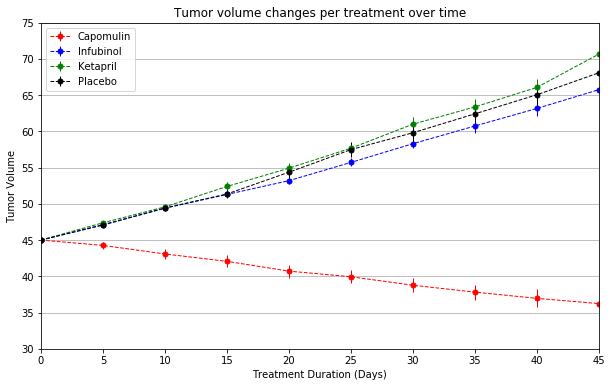

In [8]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,6)) 
plt.errorbar(tumor_volume_pivot_mean_data.index, tumor_volume_pivot_mean_data["Capomulin"],yerr=tumor_volume_pivot_sem_data["Capomulin"], color ="r", markersize =5, linestyle ="dashed", linewidth = 1, marker ='o', label ='Capomulin')
plt.errorbar(tumor_volume_pivot_mean_data.index, tumor_volume_pivot_mean_data["Infubinol"],yerr=tumor_volume_pivot_sem_data["Infubinol"], color ="b", markersize =5, linestyle ="dashed", linewidth =  1,marker ='o', label ='Infubinol')
plt.errorbar(tumor_volume_pivot_mean_data.index, tumor_volume_pivot_mean_data["Ketapril"],yerr=tumor_volume_pivot_sem_data["Ketapril"], color ="g", markersize =5, linestyle ="dashed", linewidth = 1,marker ='o', label ='Ketapril' )
plt.errorbar(tumor_volume_pivot_mean_data.index, tumor_volume_pivot_mean_data["Placebo"],yerr=tumor_volume_pivot_sem_data["Placebo"], color ="k", markersize =5, linestyle ="dashed", linewidth = 1,marker ='o', label ='Placebo' )

plt.title("Tumor volume changes per treatment over time")
plt.ylabel("Tumor Volume")
plt.xlabel("Treatment Duration (Days)")
plt.legend()

plt.ylim(30,75)
plt.xlim(0,45)
plt.grid(axis="y")


#show the figure
plt.show()


In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the metastatic growth Grouped by Drug and Timepoint
metastatic_sites = combined_trial_data.groupby(['Drug','Timepoint']).mean()["Metastatic Sites"]
metastatic_sites.head()

#Convert to DataFrame
metastatic_sites = pd.DataFrame(metastatic_sites)
metastatic_sites.head().reset_index()




,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
## Store the metastatic growth sem Grouped by Drug and Timepoint
metastatic_sites_sem = combined_trial_data.groupby(['Drug','Timepoint']).sem()["Metastatic Sites"]
metastatic_sites_sem.head()

# Convert to DataFrame
metastatic_sites_sem = pd.DataFrame(metastatic_sites_sem)
metastatic_sites_sem.head().reset_index()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
#Creating pivot tables to create indices and columns for time and drugs respectively
metastatic_sites = metastatic_sites.reset_index()
metastatic_sites_pivot = metastatic_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metastatic_sites_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
#Creating pivot table for sem to include error bars on chart  
metastatic_sites_sem = metastatic_sites_sem.reset_index()
metastatic_sites_sem_pivot = metastatic_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metastatic_sites_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


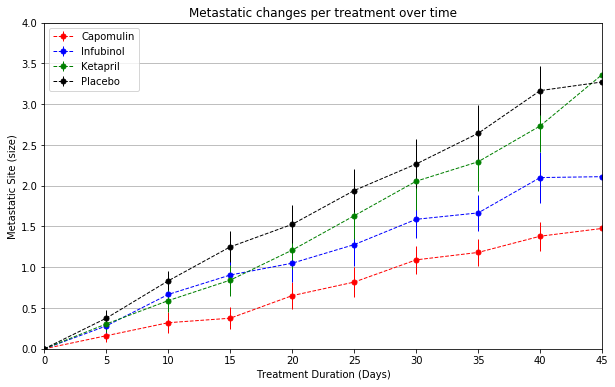

In [14]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,6)) 
plt.errorbar(metastatic_sites_pivot.index, metastatic_sites_pivot["Capomulin"],yerr = metastatic_sites_sem_pivot["Capomulin"], color ="r", markersize =5, linestyle ="dashed", linewidth = 1, fmt ='o',label ='Capomulin')
plt.errorbar(metastatic_sites_pivot.index, metastatic_sites_pivot["Infubinol"],yerr = metastatic_sites_sem_pivot["Infubinol"], color ="b", markersize =5, linestyle ="dashed", linewidth = 1, fmt ='o',label ='Infubinol')
plt.errorbar(metastatic_sites_pivot.index, metastatic_sites_pivot["Ketapril"],yerr = metastatic_sites_sem_pivot["Ketapril"], color ="g", markersize =5, linestyle ="dashed", linewidth = 1, fmt ='o',label ='Ketapril')
plt.errorbar(metastatic_sites_pivot.index, metastatic_sites_pivot["Placebo"],yerr = metastatic_sites_sem_pivot["Placebo"], color ="K", markersize =5, linestyle ="dashed", linewidth = 1, fmt ='o',label ='Placebo')


#plt.scatter(tumor_volume_pivot_mean_data.index, tumor_volume_pivot_mean_data.columns, marker="o", facecolors="red", edgecolors="black")
plt.title("Metastatic changes per treatment over time")
plt.ylabel("Metastatic Site (size)")
plt.xlabel("Treatment Duration (Days)")
plt.ylim(0,4)
plt.xlim(0,45)
plt.grid(axis="y")
plt.legend()



plt.show()




![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [16]:
# Count of mice Grouped by Drug and Timepoint
combined_trial_data.head()
mouse_count = combined_trial_data.groupby(['Drug','Timepoint']).count()["Mouse ID"]
mouse_count.head()

#Convert to DataFrame
mouse_count = pd.DataFrame(mouse_count)
mouse_count.head().reset_index()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
#Creating pivot tables to create indices and columns for time and drugs respectively
mouse_count = mouse_count.reset_index()
mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
mouse_count_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


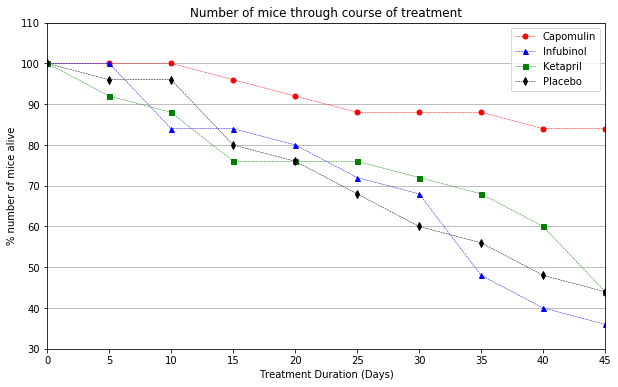

In [18]:
# Generate the Plot
plt.figure(figsize=(10,6)) 
plt.plot(100*mouse_count_pivot["Capomulin"]/25,"ro",linestyle = "dashed",markersize = 5, linewidth = 0.5, label = "Capomulin")
plt.plot(100*mouse_count_pivot["Infubinol"]/25,"b^",linestyle = "dashed",markersize = 5, linewidth = 0.5, label = "Infubinol")
plt.plot(100*mouse_count_pivot["Ketapril"]/25,"gs",linestyle = "dashed",markersize = 5, linewidth = 0.5, label = "Ketapril")
plt.plot(100*mouse_count_pivot["Placebo"]/25,"kd",linestyle = "dashed",markersize = 5, linewidth = 0.5, label = "Placebo")


plt.title("Number of mice through course of treatment")
plt.ylabel("% number of mice alive")
plt.xlabel("Treatment Duration (Days)")
plt.ylim(30,110)
plt.xlim(0,45)
plt.grid(axis="y")
plt.legend()




plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorpercentage_change = combined_trial_data.groupby(['Drug','Timepoint']).mean()["Tumor Volume (mm3)"]
tumorpercentage_change.head()

# Convert to DataFrame
tumorpercentage_change = pd.DataFrame(tumorpercentage_change)
tumorpercentage_change.head().reset_index() 



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [20]:
tumorpercentage_sem_change = combined_trial_data.groupby(['Drug','Timepoint']).sem()["Tumor Volume (mm3)"]
tumorpercentage_sem_change.head()

# Convert to DataFrame
tumorpercentage_sem_change = pd.DataFrame(tumorpercentage_sem_change)
tumorpercentage_sem_change.head().reset_index() 

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [21]:
#pivot
tumorpercentage_change = tumorpercentage_change.reset_index()
tumorpercentage_change_pivot = tumorpercentage_change.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumorpercentage_change_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [22]:
tumorpercentage_sem_change = tumorpercentage_sem_change.reset_index()
tumorpercentage_sem_change_pivot = tumorpercentage_sem_change.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumorpercentage_sem_change_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [23]:
tumorpercentage_change =  100 * (tumorpercentage_change_pivot.iloc[-1] - tumorpercentage_change_pivot.iloc[0]) / tumorpercentage_change_pivot.iloc[0]
tumorpercentage_sem_change = 100 * (tumorpercentage_sem_change_pivot.iloc[-1] - tumorpercentage_sem_change_pivot.iloc[0]) / tumorpercentage_sem_change_pivot.iloc[0]

#Display the dataframe 
tumorpercentage_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [24]:
# Store all Relevant Percent Changes into a Tuple
percentage_changes = (tumorpercentage_change["Capomulin"],
                     tumorpercentage_change["Infubinol"],
                     tumorpercentage_change["Ketapril"],
                     tumorpercentage_change["Placebo"])
percentage_changes                                            
                                            

(-19.475302667894173,
 46.123471727851836,
 57.028794686606076,
 51.29796048315153)

FileNotFoundError: [Errno 2] No such file or directory: 'charts/fig4.png'

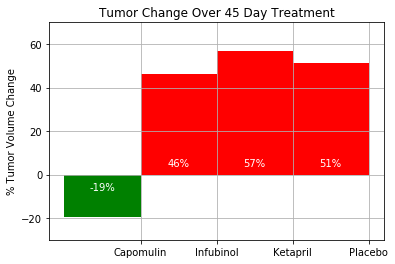

In [25]:
# Splice the data between passing and failing drugs 
fig, ax = plt.subplots()
ind = np.arange(len(percentage_changes))
width = 1
rectspass = ax.bar(ind[0], percentage_changes[0], width, color = "green")
rectsfail = ax.bar(ind[1:], percentage_changes[1:], width, color = "red")  

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril","Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,3,
               "%d%%" % int(height),
            ha = "center" , va = "bottom" , color = "white")
        
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,-8,
               "%d%%" % int(height),
            ha = "center" , va = "bottom" , color = "white")

# Call functions to implement the function calls
autolabelPass(rectspass)
autolabelFail(rectsfail)

# Save the Figure
fig.savefig("charts/fig4.png")


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)